In [36]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

In [5]:
2**8  # pixel values are integers from 0-255

256

### Create a validation set
Also, scale the inputs since we are using gradient descent. Why? Because similarly sized features make the convergence faster: https://www.quora.com/Why-is-it-important-to-scale-your-inputs-in-gradient-descent

In [6]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
np.unique(y_train_full) 

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [8]:
# indexes correspond to the values in the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt',
               'Sneaker', 'Bag', 'Ankle boot']

In [9]:
class_names[y_train[100]]

'Pullover'

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize = (2, 2))
plt.imshow(X_train[100], interpolation='nearest', cmap='viridis')
plt.show()

<Figure size 200x200 with 1 Axes>

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Alternately, pass it as a list:
# model = keras.models.Sequential(
#     [
#         keras.layers.Flatten(input_shape=[28, 28]),
#         keras.layers.Dense(300, activation="relu"),
#         keras.layers.Dense(100, activation="relu"),
#         keras.layers.Dense(10, activation="softmax"),
#     ]
# )

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Param. calculation example:
# number of inputs (28*28)
# number of neurons in the first layer (300)
# one bias for each neuron (300)
28*28 * 300 + 300

235500

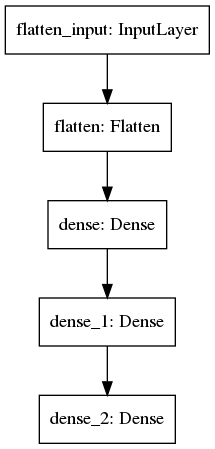

In [46]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='the-model.png')

In [47]:
os.remove('the-model.png')

In [15]:
model.layers

In [16]:
hidden1 = model.layers[1]

In [17]:
print(model.layers[1].name)
model.get_layer('dense') is hidden1

dense


True

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.02792095,  0.06157978, -0.06850148, ...,  0.00057472,
        -0.03152382,  0.04305192],
       [-0.06516187, -0.06979315, -0.04590184, ...,  0.03122664,
        -0.01769427, -0.01383691],
       [ 0.0305446 ,  0.07062531,  0.06068827, ...,  0.01395673,
         0.04571249, -0.04775488],
       ...,
       [ 0.01969572,  0.07392944,  0.06665996, ...,  0.04098661,
        -0.06173836,  0.06942266],
       [-0.03416004,  0.01758152,  0.0061315 , ..., -0.00700266,
        -0.06623799,  0.03294065],
       [ 0.07318422,  0.04806808,  0.0310317 , ...,  0.0152765 ,
         0.02987796,  0.03474622]], dtype=float32)

In [19]:
weights.shape, biases.shape

((784, 300), (300,))

In [20]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd', 
              metrics=['accuracy'],
             )

In [21]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 4s 73us/sample - loss: 0.7172 - accuracy: 0.7655 - val_loss: 0.5022 - val_accuracy: 0.8324
Epoch 2/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.4890 - accuracy: 0.8296 - val_loss: 0.4474 - val_accuracy: 0.8504
Epoch 3/30
55000/55000 [==============================] - 3s 57us/sample - loss: 0.4445 - accuracy: 0.8439 - val_loss: 0.4197 - val_accuracy: 0.8526
Epoch 4/30
55000/55000 [==============================] - 3s 54us/sample - loss: 0.4164 - accuracy: 0.8542 - val_loss: 0.4196 - val_accuracy: 0.8540
Epoch 5/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3960 - accuracy: 0.8602 - val_loss: 0.3951 - val_accuracy: 0.8610
Epoch 6/30
55000/55000 [==============================] - 3s 56us/sample - loss: 0.3800 - accuracy: 0.8653 - val_loss: 0.3844 - val_accuracy: 0.8702
Epoch 7/30
55000/55000 [==============================] -

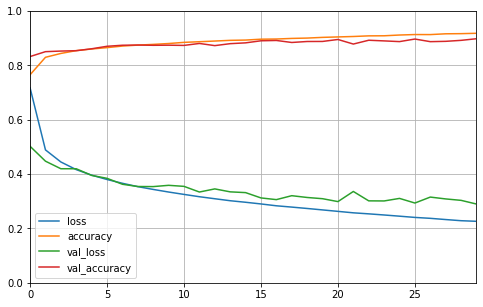

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)  # set the vertical range to [0 - 1]
plt.show()

In [28]:
model.evaluate(X_test, y_test, verbose=2)

10000/1 - 0s - loss: 52.0659 - accuracy: 0.8464


[62.3174989692688, 0.8464]